In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#We need some data first
df1 = pd.read_csv("tensor_flow_commits1.csv")
df2 = pd.read_csv("tensor_flow_commits2.csv")
df3 = pd.read_csv("tensor_flow_commits3.csv")
df4 = pd.read_csv("tensor_flow_commits4.csv")

# Merge DataFrames
df = pd.concat([df1, df2, df3, df4], axis = 0)

In [3]:
# Remove duplicate
df.replace('N/A', np.nan, inplace=True)
df.drop_duplicates(inplace = True)

In [4]:
df['Updated at'] = pd.to_datetime(df['Updated at'], errors='coerce')
df.sort_values('Updated at', inplace = True)
df.reset_index(drop = True, inplace = True)

In [5]:
df['Additions commit'] = df['Commit Message'].str.len()
df['Files Changed'] = df['Files Changed'].apply(lambda x: x.split(', ') if pd.notna(x) else [])
df['Files Changed Count'] = df['Files Changed'].apply(len)
df

,Commit Message,Name,Email,Updated at,Files Changed,Contributor,All Checks Passed,Additions commit,Files Changed Count
0,Optimize MIN_FIRST quantization with oneDNN.,mdfaijul,md.faijul.amin@intel.com,2023-08-18 15:00:08,[tensorflow/core/kernels/mkl/mkl_quantize_op.c...,mdfaijul,True,44,2
1,Enable quantized matmul fusions.,mdfaijul,md.faijul.amin@intel.com,2023-09-07 00:56:01,"[tensorflow/core/kernels/mkl/BUILD, tensorflow...",mdfaijul,True,32,10
2,Address review comments.,mdfaijul,md.faijul.amin@intel.com,2024-01-24 16:12:05,[tensorflow/core/kernels/mkl/mkl_quantize_op.cc],mdfaijul,True,24,1
3,Fix Windows compilation issue.,mdfaijul,md.faijul.amin@intel.com,2024-02-06 05:27:11,[tensorflow/core/kernels/mkl/mkl_quantize_op.cc],mdfaijul,True,30,1
4,Automated Code Change\n\nPiperOrigin-RevId: 62...,A. Unique TensorFlower,gardener@tensorflow.org,2024-04-08 01:31:30,[tensorflow/compiler/mlir/lite/quantization/BU...,tensorflower-gardener,False,51,4
...,...,...,...,...,...,...,...,...,...
2868,Automated Code Change\r\n\r\nPiperOrigin-RevId...,A. Unique TensorFlower,gardener@tensorflow.org,2024-06-09 00:18:54,[third_party/xla/xla/stream_executor/host/BUIL...,tensorflower-gardener,False,53,3
2869,compat: Update forward compatibility horizon t...,A. Unique TensorFlower,gardener@tensorflow.org,2024-06-09 09:02:10,[tensorflow/python/compat/compat.py],tensorflower-gardener,False,90,1
2870,Update GraphDef version to 1888.\r\n\r\nPiperO...,A. Unique TensorFlower,gardener@tensorflow.org,2024-06-09 09:02:15,[tensorflow/core/public/version.h],tensorflower-gardener,False,64,1
2871,Issue a warning where code relies on a bug whe...,Peter Hawkins,phawkins@google.com,2024-06-09 16:17:42,"[third_party/xla/xla/python/BUILD, third_party...",hawkinsp,False,380,2


In [6]:
# Ensure the 'Contributor' column does not have missing values
df['Contributor'] = df['Contributor'].fillna('Unknown')

# Count the total number of contributors
total_contributors = df['Contributor'].nunique()
print(f'Total number of contributors: {total_contributors}')

# Count the number of commits per contributor
contributor_commit_counts = df['Contributor'].value_counts()

# Find the top 5 contributors
top_5_contributors = contributor_commit_counts.head(5)
print('\nTop 5 contributors:')
print(top_5_contributors)
# Calculate the percentage of commits made by the top 5 contributors
total_commits = len(df)
top_5_percentage = (top_5_contributors / total_commits) * 100
print('\nTop 5 contributors percentage of total commits:')
print(top_5_percentage)

# Calculate the activity period for each contributor
contributor_activity_period = df.groupby('Contributor')['Updated at'].agg(['min', 'max'])
contributor_activity_period['Activity Period'] = contributor_activity_period['max'] - contributor_activity_period['min']

# Find the most regular contributor (by number of commits)
most_regular_contributor = top_5_contributors.idxmax()
print(f'\nMost regular contributor: {most_regular_contributor}')

# Find the contributor with the longest activity period
longest_contributing_contributor = contributor_activity_period['Activity Period'].idxmax()
print(f'Contributor with the longest activity period: {longest_contributing_contributor}')

# Extract email domains
df['Email Domains'] = df['Email'].apply(lambda x: x.split('@')[-1] if pd.notna(x) else 'Unknown')
email_domain_counts = df['Email Domains'].value_counts()
print("\nEmail Domain Counts:")
print(email_domain_counts)

print(f'\nTotal Contributors: {total_contributors}')
print(f'\nTop 5 Contributors:\n{top_5_contributors}')
print(f'\nTop 5 Contributors Percentage:\n{top_5_percentage}')
print(f'\nContributor Activity Period:\n{contributor_activity_period}')
print(f'\nMost Regular Contributor: {most_regular_contributor}')
print(f'\nContributor with Longest Activity Period: {longest_contributing_contributor}')

Total number of contributors: 216

Top 5 contributors:
Contributor
tensorflower-gardener    1089
ezhulenev                 162
klucke                    138
jreiffers                  85
kuym                       55
Name: count, dtype: int64

Top 5 contributors percentage of total commits:
Contributor
tensorflower-gardener    37.904629
ezhulenev                 5.638705
klucke                    4.803341
jreiffers                 2.958580
kuym                      1.914375
Name: count, dtype: float64

Most regular contributor: tensorflower-gardener
Contributor with the longest activity period: mdfaijul

Email Domain Counts:
Email Domains
google.com                  1595
tensorflow.org              1089
nvidia.com                    90
intel.com                     40
users.noreply.github.com      36
amd.com                        8
fastmail.fm                    5
gmail.com                      3
amazon.com                     3
inailuig.it                    1
126.com                

In [7]:
df['Commit Message Category'] = df['Commit Message'].apply(lambda x: 'Refactor' if 'Refactor' in x else 
                                                           'Bug fix' if 'Bug' in x or 'Fix' in x else 
                                                           'Feature' if 'Feature' in x else 
                                                           'Other')
correlation = df['All Checks Passed'].astype(int).corr(df['Files Changed Count'])
print(f"The correlation between the number of files changed and checks run success is {correlation}")
# Calculate success rate for each commit message category
commit_message_success_rate = df.groupby('Commit Message Category')['All Checks Passed'].mean()

# Convert to percentage and print
commit_message_success_rate_percentage = commit_message_success_rate * 100
print(commit_message_success_rate_percentage)

The correlation between the number of files changed and checks run success is 0.22202710274094795
Commit Message Category
Bug fix     2.439024
Other       0.957488
Refactor    0.000000
Name: All Checks Passed, dtype: float64


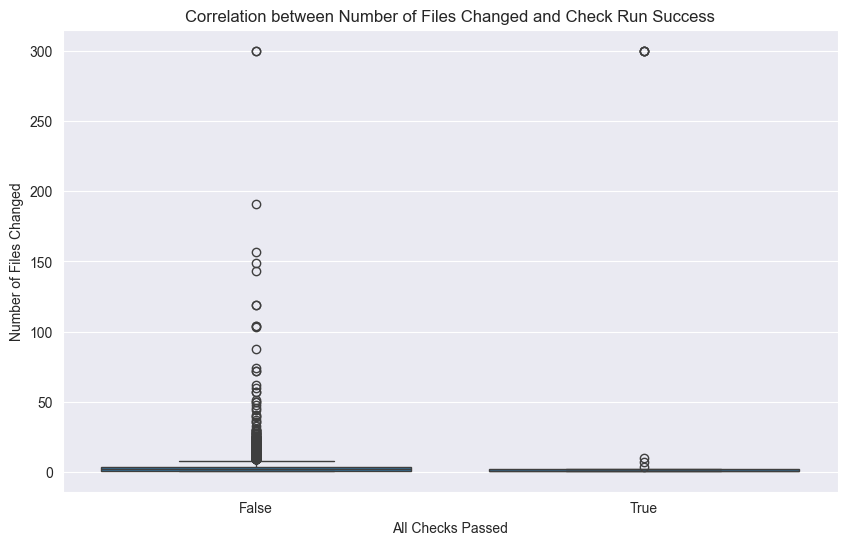

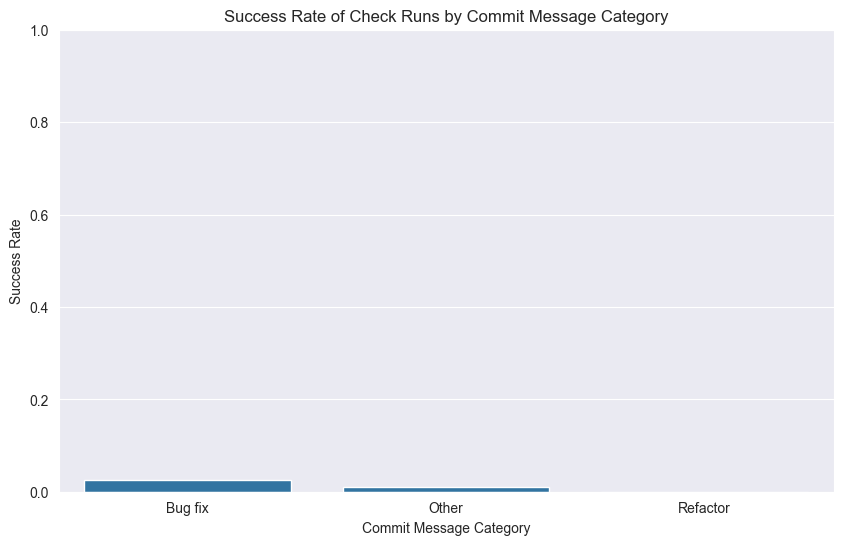

In [8]:
df['All Checks Passed'] = df['All Checks Passed'].astype(bool)
plt.figure(figsize=(10, 6))
sns.boxplot(x='All Checks Passed', y='Files Changed Count', data=df)
plt.title('Correlation between Number of Files Changed and Check Run Success')
plt.xlabel('All Checks Passed')
plt.ylabel('Number of Files Changed')
plt.show()
#Success rate of check runs by commit message category
success_rates = df.groupby('Commit Message Category')['All Checks Passed'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Commit Message Category', y='All Checks Passed', data=success_rates)
plt.title('Success Rate of Check Runs by Commit Message Category')
plt.xlabel('Commit Message Category')
plt.ylabel('Success Rate')
plt.ylim(0, 1)
plt.show()

In [9]:
# Numericals stats
numerical_columns = ['Additions commit', 'Files Changed Count']
numerical_stats = df[numerical_columns].describe()
numerical_stats

,Additions commit,Files Changed Count
count,2873.000000,2873.000000
mean,189.947442,5.150017
std,406.510013,16.593413
min,10.000000,1.000000
25%,64.000000,1.000000
50%,97.000000,2.000000
75%,181.000000,4.000000
max,11335.000000,300.000000


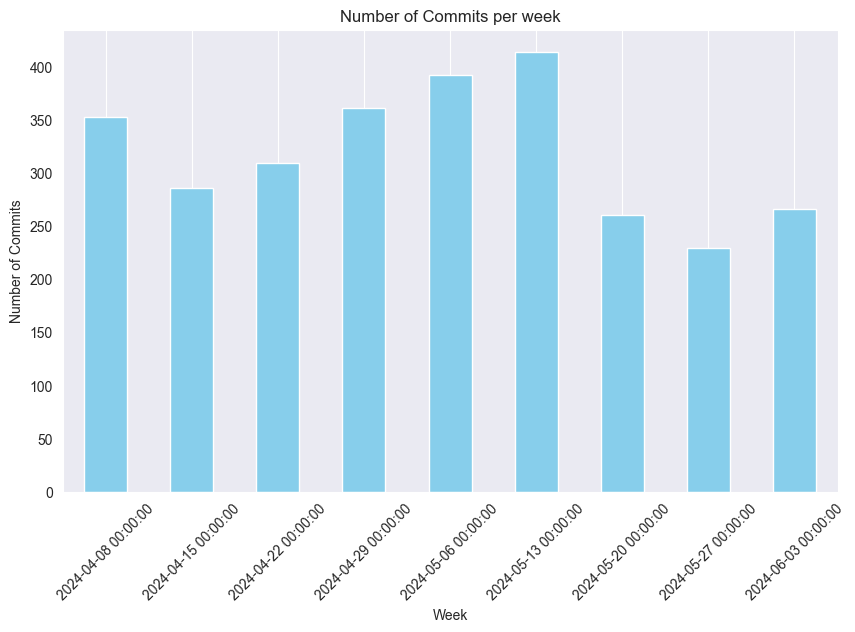

In [10]:
'''Draw a chart to show up the commits for every week'''
# Fill the Data into the right times
start_date = '2024-04-7'
end_date =  '2024-06-10'
mask = (df['Updated at'] >= start_date) & (df['Updated at'] <= end_date)
df_filtered = df.loc[mask].copy()

# Create a Week row from 'Updated at'
df_filtered['Week'] = df_filtered['Updated at'].dt.to_period('W').apply(lambda r:r.start_time)

# Commits counter
weekly_commits = df_filtered.groupby('Week').size()

# Draw the chart
plt.figure(figsize = (10, 6))
weekly_commits.plot(kind = 'bar', color = 'skyblue')
plt.title('Number of Commits per week')
plt.xlabel('Week')
plt.ylabel('Number of Commits')
plt.xticks(rotation = 45)
plt.grid(axis = 'y')

# Show the Chart
plt.show()

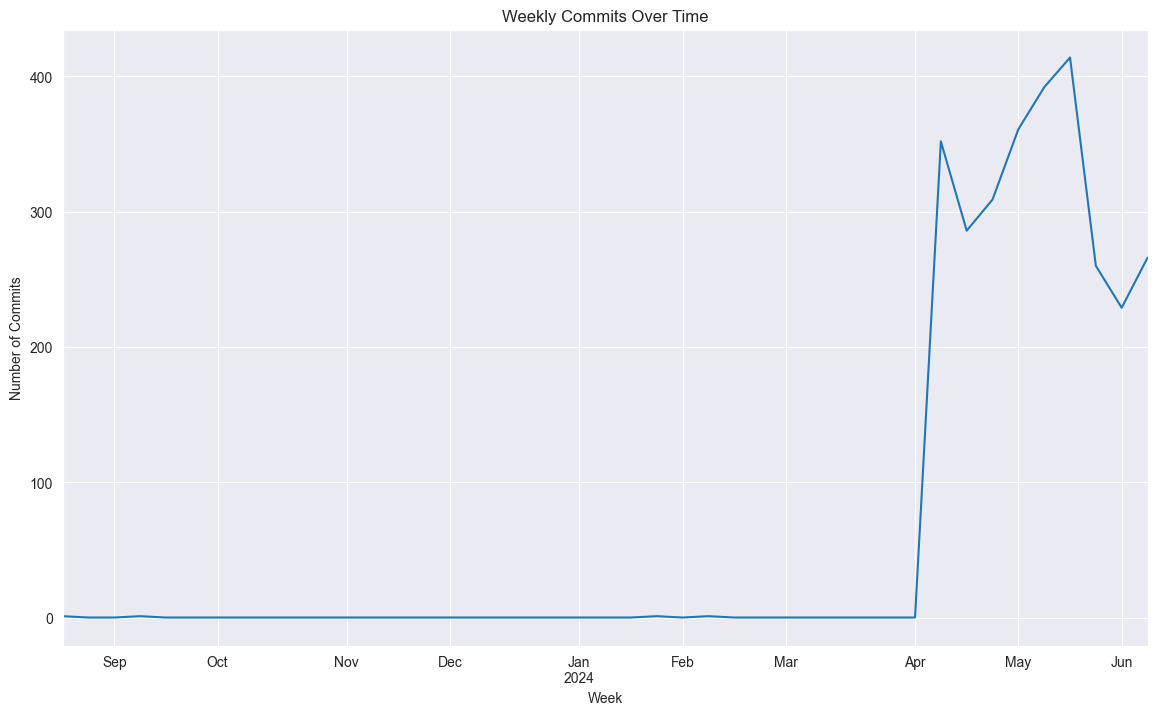

In [11]:
# Ensure 'Updated at' is in datetime format
df['Updated at'] = pd.to_datetime(df['Updated at'])

# Set 'Updated at' as the index
df.set_index('Updated at', inplace=True)

# Now you can group by 'Updated at' and calculate the total number of commits for each week
weekly_commits = df.resample('W').size()

# Plot the result
plt.figure(figsize=(14, 8))
weekly_commits.plot(kind='line')
plt.title("Weekly Commits Over Time")
plt.xlabel("Week")
plt.ylabel("Number of Commits")
plt.show()

In [12]:
# Group by 'Author Name' and calculate the total 'Files Changed Count' for each author
author_file_changes = df.groupby('Name')['Files Changed Count'].sum()

# Print the result
print(author_file_changes)

Name
A. Unique TensorFlower    3533
Abhinav Gunjal               8
Adam Banaś                  27
Adrian Kuegel              167
Akhil Goel                   1
                          ... 
sachinmuradi                12
sushreebarsa                 1
tilakrayal                   1
zhu jianjiang                1
zoranjovanovic-ns            7
Name: Files Changed Count, Length: 231, dtype: int64


Most changed file: tensorflow/core/ops/ops.pbtxt
Frequency: 194
Files Changed
third_party/xla/xla/service/gpu/fusions/BUILD       39
third_party/xla/xla/service/gpu/runtime/BUILD       41
third_party/xla/xla/service/cpu/BUILD               42
third_party/xla/xla/service/gpu/gpu_compiler.cc     51
tensorflow/python/compat/compat.py                  58
tensorflow/core/public/version.h                    59
third_party/llvm/workspace.bzl                      69
third_party/xla/xla/service/BUILD                   70
third_party/xla/xla/service/gpu/BUILD              128
tensorflow/core/ops/ops.pbtxt                      194
Name: count, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'tensorflow/core/ops/ops.pbtxt'),
  Text(1, 0, 'third_party/xla/xla/service/gpu/BUILD'),
  Text(2, 0, 'third_party/xla/xla/service/BUILD'),
  Text(3, 0, 'third_party/llvm/workspace.bzl'),
  Text(4, 0, 'tensorflow/core/public/version.h'),
  Text(5, 0, 'tensorflow/python/compat/compat.py'),
  Text(6, 0, 'third_party/xla/xla/service/gpu/gpu_compiler.cc'),
  Text(7, 0, 'third_party/xla/xla/service/cpu/BUILD'),
  Text(8, 0, 'third_party/xla/xla/service/gpu/runtime/BUILD'),
  Text(9, 0, 'third_party/xla/xla/service/gpu/fusions/BUILD'),
  Text(10, 0, 'third_party/llvm/generated.patch'),
  Text(11, 0, 'third_party/xla/xla/service/gpu/tests/BUILD'),
  Text(12, 0, 'third_party/xla/xla/client/xla_builder_test.cc')])

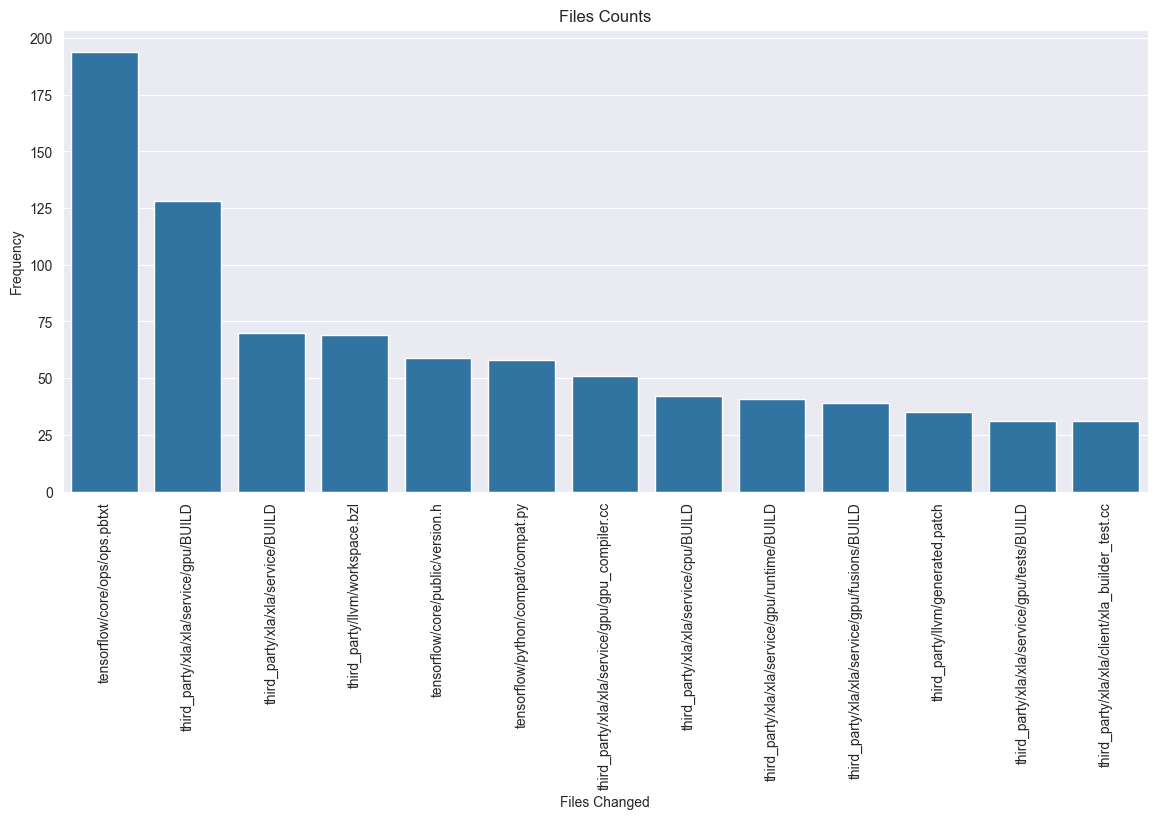

In [13]:
'''Files changed Data''' 
# Find most changed files in Data
df_exploded = df.explode('Files Changed')
file_counts = df_exploded['Files Changed'].value_counts()
file_counts = file_counts[file_counts > 30]
most_changed_file = file_counts.idxmax()
file_change_frequency = file_counts.max()
print("Most changed file:", most_changed_file)
print("Frequency:", file_change_frequency)
# Find all the changes Files in the DataFrames
file_counts_sorted = file_counts.sort_values(ascending = True)
file_counts_sorted.tail(10)
print(file_counts_sorted.tail(10))

#Draw the Chart
plt.figure(figsize=(14, 6))
sns.barplot(x = file_counts.index, y = file_counts.values)
plt.title('Files Counts')
plt.xlabel('Files Changed')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)



In [14]:
def true_percentage(s):
    return sum(s) / len(s) * 100

df_cleaned = df.dropna(subset=['All Checks Passed'])

# No filter applied here
author_checks_passed_percentage = df_cleaned.groupby('Name').agg({'All Checks Passed': true_percentage})
high_success_authors = author_checks_passed_percentage[author_checks_passed_percentage['All Checks Passed'] > 0]
sorted_authors = high_success_authors.sort_values(by='All Checks Passed', ascending=False)
commit_counts = df['Name'].value_counts()
sorted_authors = sorted_authors.assign(commit_count=commit_counts)
print(sorted_authors)

                  All Checks Passed  commit_count
Name                                             
Akhil Goel                    100.0             1
Ashiq Imran                   100.0             1
Gauri1 Deshpande              100.0             2
Matt Bahr                     100.0             2
Robin Zhang                   100.0             2
Surya                         100.0             3
Yimei Sun                     100.0             8
guozhong.zhuang               100.0             2
mdfaijul                      100.0             8
tilakrayal                    100.0             1
Raunak                         50.0             2


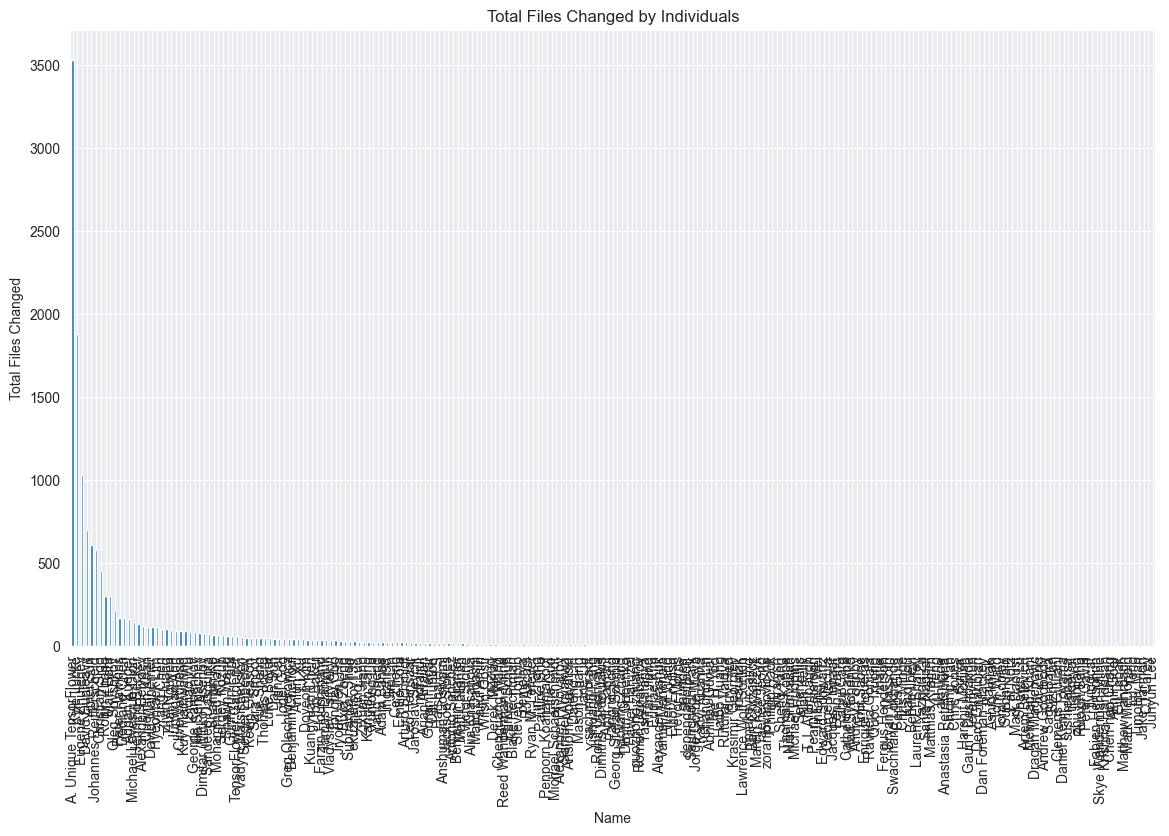

In [15]:
# Group by 'Author Name' and calculate the total 'Files Changed Count' for each author
author_file_changes = df.groupby('Name')['Files Changed Count'].sum()

# Sort the result in descending order
author_file_changes_sorted = author_file_changes.sort_values(ascending=False)

# Plot the result
plt.figure(figsize=(14, 8))
author_file_changes_sorted.plot(kind='bar')
plt.title("Total Files Changed by Individuals")
plt.xlabel("Name")
plt.ylabel("Total Files Changed")
plt.xticks(rotation=90)
plt.show()

In [16]:
# Get commits per day
commit_frequency_days = df.resample('D').size()
commit_frequency_days.sort_values()

Updated at
2024-01-13     0
2024-05-27     0
2024-01-14     0
2024-01-15     0
2024-01-16     0
              ..
2024-05-10    80
2024-04-23    85
2024-05-02    86
2024-05-13    86
2024-05-16    87
Length: 297, dtype: int64

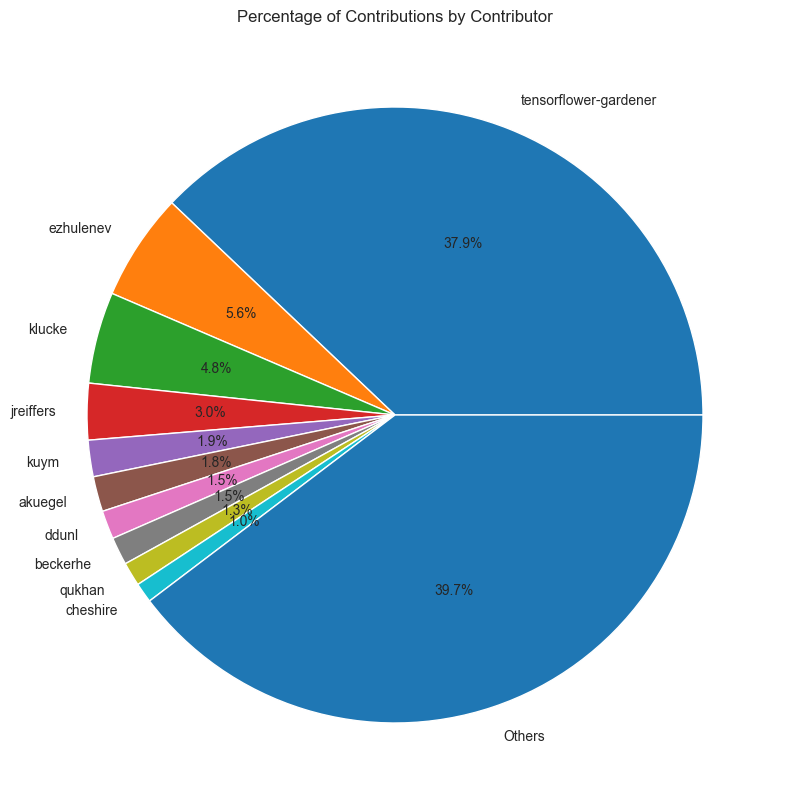

In [17]:
# Calculate the percentage of commits made by each contributor
contributor_commit_percentages = df['Contributor'].value_counts(normalize=True) * 100

# Get the top 10 contributors
top_10_contributors = contributor_commit_percentages.nlargest(10)

# Calculate the percentage for 'Others'
others_percentage = contributor_commit_percentages[~contributor_commit_percentages.index.isin(top_10_contributors.index)].sum()

# Concatenate 'Others' to the top 10 contributors
contributor_commit_percentages_final = pd.concat([top_10_contributors, pd.Series(others_percentage, index=['Others'])])

# Plot the result
plt.figure(figsize=(10, 10))
plt.pie(contributor_commit_percentages_final, labels=contributor_commit_percentages_final.index, autopct='%1.1f%%')
plt.title('Percentage of Contributions by Contributor')
plt.show()